# Zomato Data Analysis 

## Step 1 - Importing Libraries

* pandas is used for data manipulation and analysis.
* numpy is used for numerical operations.
* matplotlib.pyplot and seaborn is used for data visualization.

In [2]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 - Create the data frame

In [3]:
dataframe = pd.read_csv("Zomato data .csv")

In [4]:
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

## Convert  the data type of column rate

In [5]:
def handlerate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handlerate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Q1: What type of restaurant do the majority of customers order from?

# Type of Restaurant

In [7]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, "Majority of Customer's for Resturant")

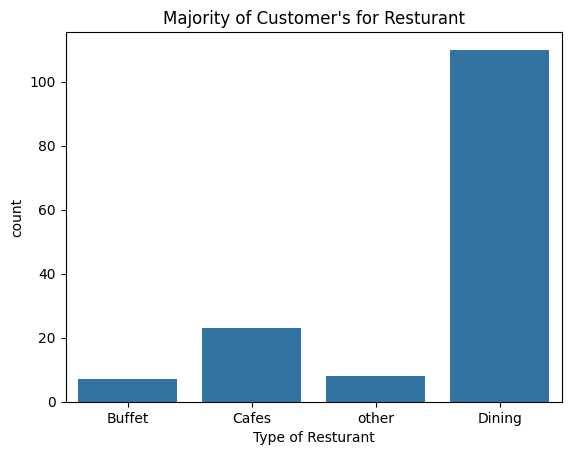

In [8]:
sns.countplot(x= dataframe['listed_in(type)'])
plt.xlabel("Type of Resturant")
plt.title("Majority of Customer's for Resturant")


### Conclusion - majority of the resturant falls in dinning category

## Q2: How many votes has each type of restaurant received from customers?

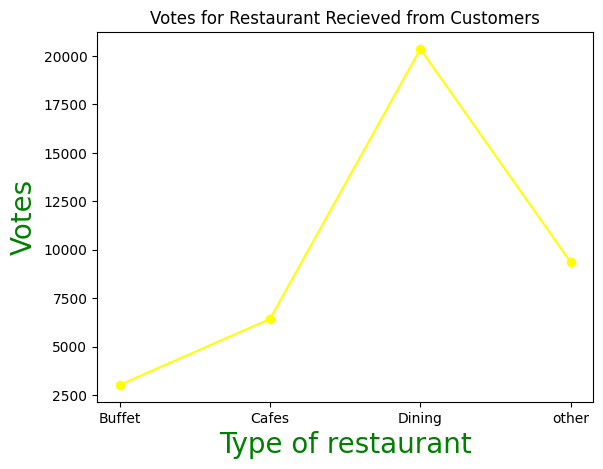

In [9]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='yellow', marker='o')
plt.xlabel('Type of restaurant', c='green', size=20)
plt.ylabel("Votes", c='green', size=20)
plt.title("Votes for Restaurant Recieved from Customers")
plt.savefig("Votes Recieved From Customers.png", dpi=300)

### Conclusion: Dinning Restaurant has Recieved maximum Votes

## Q3: What are the rating that the majority of restaurants have received?

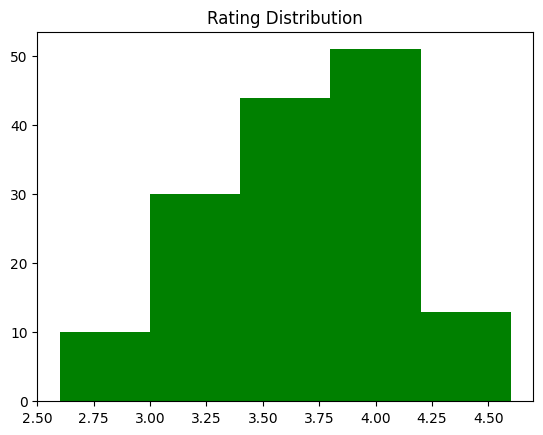

In [10]:
plt.hist(dataframe['rate'], bins=5, color='green')
plt.title("Rating Distribution")
plt.savefig("Rating Distribution for Restaurant", dpi=300)
plt.show()

### Conclusion: The Majority Restaurants Recieved Rating from 3.5 to 4

In [11]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


## Q4: Zomato has observed that most couples order most of their food online.What is their average spending on each order?

### Average order spending by couples

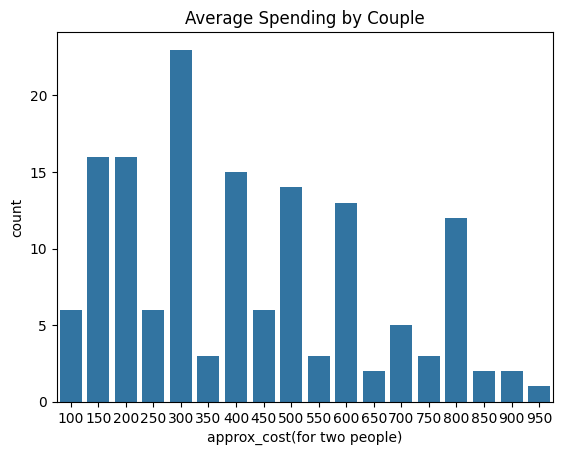

In [12]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.title("Average Spending by Couple")
plt.savefig("Average orderSpending by Couples", dpi=300)

### Conclusion: The majority of couples prefer restaurants with an approx_cost of 300 rupees

## Q5: Which mode (online or offline) has received the maximum rating?

### Which Mode Received maximum rating

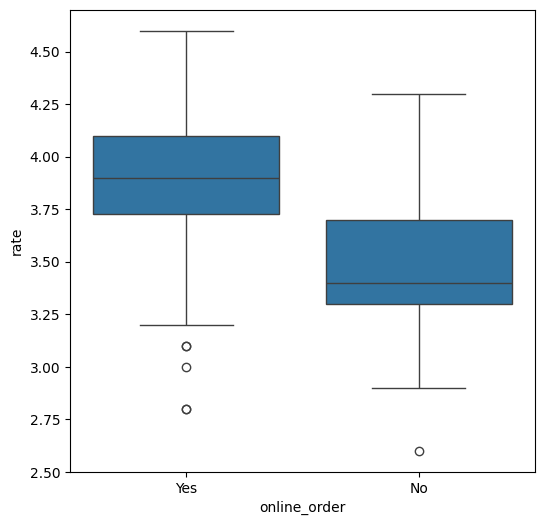

In [13]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data= dataframe)
plt.savefig("Mode Recieved Maximam Rating.png", dpi=300)


### Conclusion: Offline order recieved lower rating in comparison to online order

## Q6: Which type of restaurant recieved more offline orders, so that zomato can proves customers with some good offers?

In [15]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


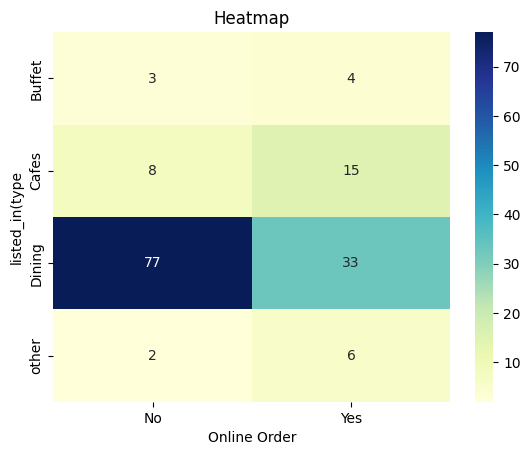

In [18]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns = 'online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("listed_in(type")
plt.savefig("Heatmap for Online and Offline Orders.png", dpi=300)
plt.show()

#### Conclusion: Dinning restaurant primarly accepts offline orders, where as cafes restaurant primalry recieved online_orders,this suggests that clients prefers orders in personat restaurant, but prefer online ordering at cafes.  